In [3]:
library(Seurat)
library(scran)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

# Process cd14

In [25]:
cd14 <- Read10X('../../data/cd14')
cd14 <- CreateSeuratObject(cd14)
cd14 <- NormalizeData(cd14)
cd14 <- FindVariableFeatures(cd14)
cd14 <- ScaleData(cd14)
cd14 <- RunPCA(cd14)
cd14 <- FindNeighbors(cd14, dims=1:10)
cd14 <- FindClusters(cd14, resolution=0.3)
cd14 <- RunTSNE(cd14, dims=1:20)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix

PC_ 1 
Positive:  G0S2, DENND3, PHC2, MADD, ATP6V0A1, TLE3, IRS2, KCNE3, TPPP3, TNPO3 
	   TK2, SIGLEC1, SETD1A, USP12, NPLOC4, CPEB2, MNT, CSNK1G3, TPRN, NLRP3 
	   ZBTB43, NUDT14, IFITM3, GATAD2B, S100Z, IKZF4, KMT2B, IL17RA, RRAD, SCGB3A2 
Negative:  CLEC9A, HLA-DOB, NDRG2, DNASE1L3, SNX3, PPA1, LDHA, HLA-DPA1, HMGA1, HMGN1 
	   GDI2, IDO1, GYPC, NPM1, YBX1, SERPINF2, HLA-DQA1, IRF8, PPM1J, TMED2 
	   PEBP1, C1orf54, TMEM14A, GNG7, TRAM1, BASP1, PDLIM1, ACTR3, PPT1, CPVL 
PC_ 2 
Positive:  MZB1, IGJ, AL928768.3, DERL3, FKBP11, CD79A, TNFRSF17, CD27, AQP3, IGLL5 
	   TNFRSF13B, GPRC5D, ITM2C, HRASLS2, LMAN1, ISG20, ABCB9, GPX7, ZBP1, FAM46C 
	   RP11-16E12.2, POU2AF1, TPD52, PDLIM1, NTAN1, NPIPB6, EAF2, PERP, APOBEC3B, XBP1 
Negative:  CLEC9A, CST3, NDRG2, LYZ, HLA-DPB1, HLA-DOB, DNASE1L3, HLA-DRA, HLA-DQA1, CPVL 
	   IDO1, HLA-DQA2, HLA-DPA1, HLA-DRB1, TMEM1

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2612
Number of edges: 88396

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8311
Number of communities: 6
Elapsed time: 0 seconds


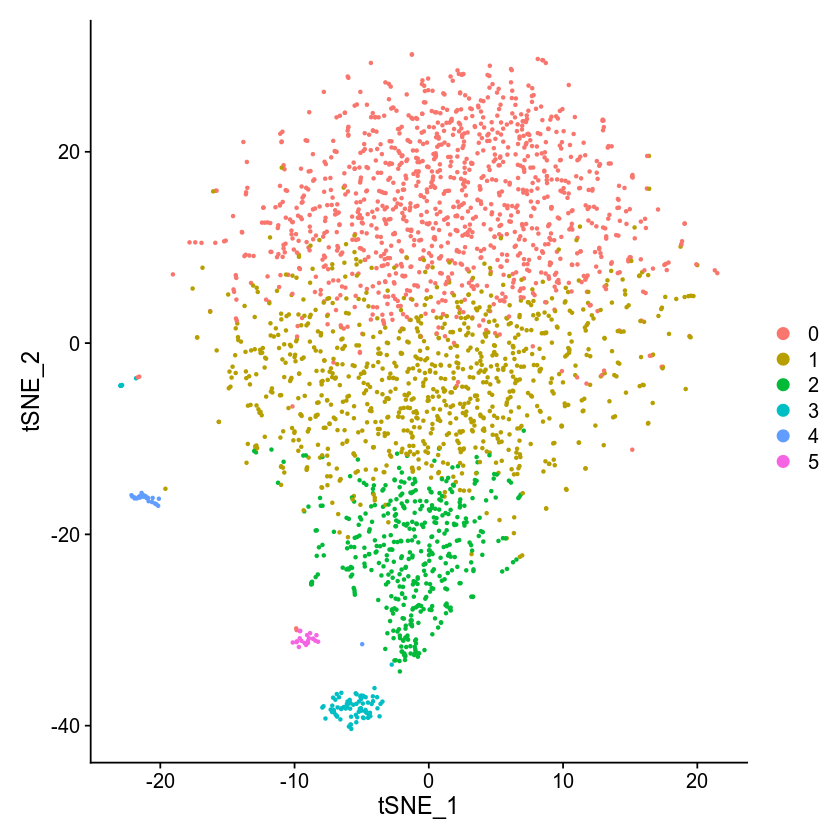

In [26]:
DimPlot(cd14)

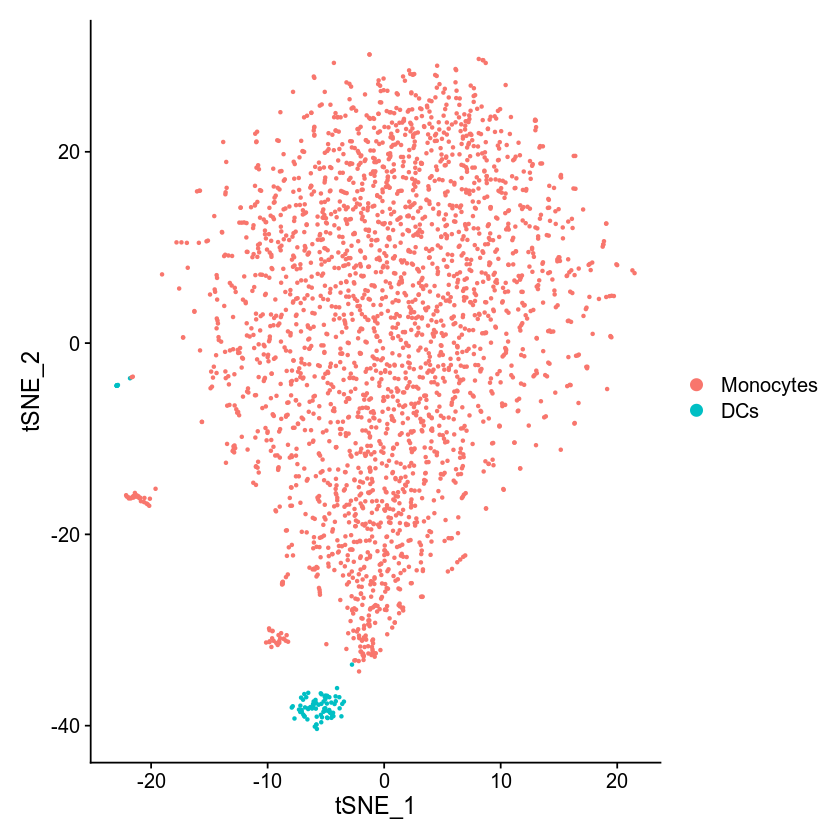

In [27]:
x <- Idents(cd14)
Idents(cd14) <- ifelse(x==3, 'DCs', 'Monocytes')
DimPlot(cd14)

# Process B cells

In [28]:
bcells <- Read10X('../../data/b_cells')
bcells <- CreateSeuratObject(bcells)
Idents(bcells) <- 'B cells'

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


# Merge cells

In [34]:
obj <- merge(cd14, bcells)
obj <- NormalizeData(obj)
obj <- FindVariableFeatures(obj)
obj <- ScaleData(obj)
obj <- RunPCA(obj)
obj <- RunTSNE(obj, dims=1:20)
obj@meta.data$celltype <- Idents(obj)
obj@meta.data

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Centering and scaling data matrix

PC_ 1 
Positive:  LTB, MALAT1, CD52, CD74, RPS18, HLA-DRA, HLA-DPA1, MS4A1, TCL1A, RPS4X 
	   HLA-DPB1, ARHGDIB, HLA-DQA2, HLA-DQA1, IGLL5, SNX3, IRF8, PLAC8, AC079767.4, SMARCB1 
	   RP5-887A10.1, B2M, MZB1, UCP2, STAG3, MYC, MT-CO1, SMIM14, RP11-164H13.1, PPP1R14A 
Negative:  TYROBP, CST3, S100A9, S100A8, LYZ, AIF1, S100A4, FCN1, FCER1G, LGALS1 
	   TYMP, S100A6, LST1, FTL, CFD, PSAP, CEBPD, S100A11, CD14, TSPO 
	   TMEM176B, GPX1, LGALS2, NEAT1, CFP, FTH1, SRGN, GABARAP, TIMP1, GSTP1 
PC_ 2 
Positive:  S100A8, S100A9, TYROBP, FTL, CFD, CD14, S100A12, FCN1, TCL1A, TMEM176B 
	   LST1, LINC00936, RBP7, AIF1, MIR24-2, CDA, FOSB, CSF3R, NEAT1, RETN 
	   FCER1G, FTH1, ASGR1, CTSD, TNFAIP2, NUP214, CEBPD, G0S2, FPR1, RP11-290F20.3 
Negative:  HLA-DQA1, HLA-DPA1, CD27, ACTG1, HLA-DPB1, CLEC9A, C

,orig.ident,nCount_RNA,nFeature_RNA,RNA_snn_res.0.3,seurat_clusters,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<fct>
AAACATACCACTAG-1_1,SeuratProject,658,324,1,1,Monocytes
AAACATACGTTCAG-1_1,SeuratProject,700,348,0,0,Monocytes
AAACATTGACGGTT-1_1,SeuratProject,738,352,1,1,Monocytes
AAACATTGCTTCGC-1_1,SeuratProject,703,338,0,0,Monocytes
AAACATTGGGCAAG-1_1,SeuratProject,1544,590,1,1,Monocytes
AAACATTGTTTGTC-1_1,SeuratProject,2228,802,2,2,Monocytes
AAACGCACGGACTT-1_1,SeuratProject,3836,1258,5,5,Monocytes
AAACGGCTACGGAG-1_1,SeuratProject,658,324,0,0,Monocytes
AAACGGCTAGTCAC-1_1,SeuratProject,942,433,0,0,Monocytes


In [35]:
write.csv(obj@meta.data, 'fig1c.csv')